In [72]:
import pandas as pd
import seaborn as sns
sns.set_theme(style='whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

In [73]:
data = pd.read_csv('./data_to_model/세대원_상가_제로_유치원_환경_도시농업_초등학교_사업체_채식_인구수_연령별_카페_유동인구_매출_sum.csv', index_col=0)
data.fillna(0, inplace=True)

In [80]:
# 이상치 박스플롯으로 보여주는 함수 생성
def show_outlier(data):
    plt.figure(figsize=(8, len(data.columns) * 1.5))

    for i, col in enumerate(data.columns, 1):
        # plt.rcParams['font.family'] = 'Malgun Gothic'
        plt.subplot(len(data.columns), 1, i)
        sns.boxplot(x=data[col])
        plt.title(col)

    plt.tight_layout()
    plt.show()

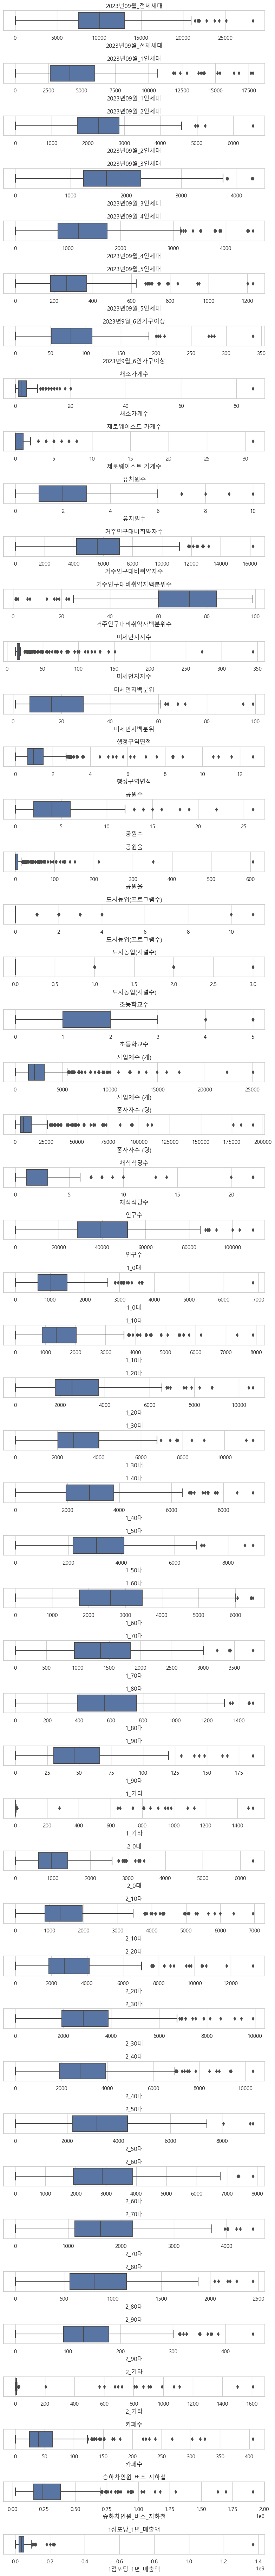

In [81]:
# 박스플랏으로 이상치 탐색 
show_outlier(data)

In [83]:
# 이상치 제거 함수 생성
def remove_outlier(df):
    quartile_1 = df.quantile(0.25)
    quartile_3 = df.quantile(0.75)
    IQR = quartile_3 - quartile_1
    condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))
    condition = condition.any(axis=1)
    search_df = df[condition]
    removed_outlier_df = df.copy()
    removed_outlier_df.drop(search_df.index, axis=0, inplace=True)
 
    return removed_outlier_df

removed_outlier_df = remove_outlier(data)

In [84]:
# 이상치 제거 후
removed_outlier_df.shape

(161, 49)

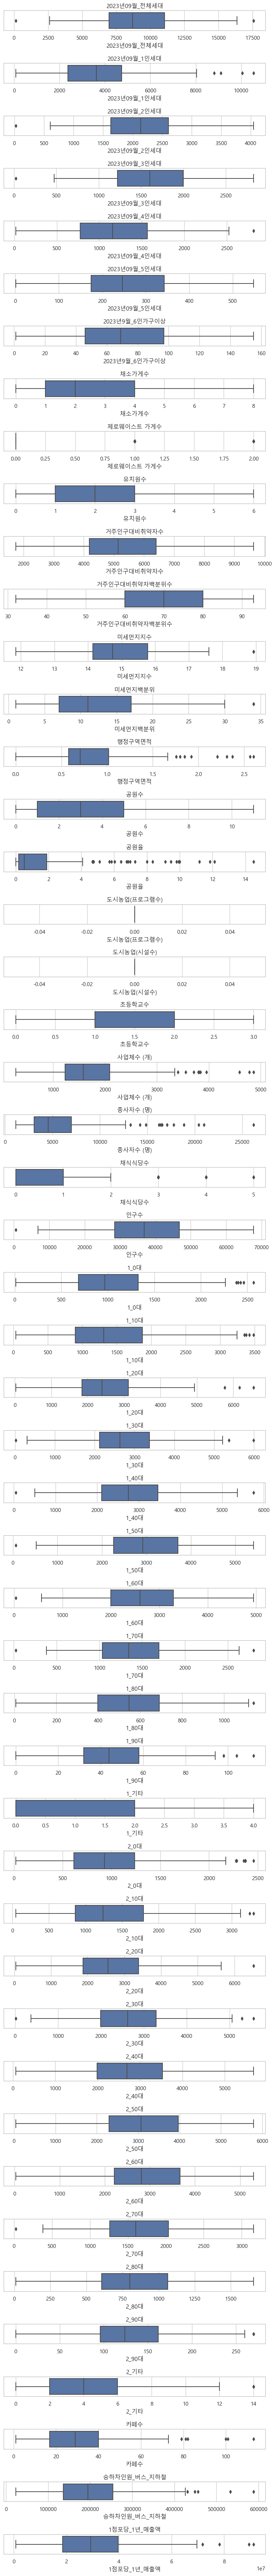

In [85]:
# 이상치 제거 후, 박스플롯 확인
show_outlier(removed_outlier_df)

In [88]:
df_name = 'removed_outlier'
removed_outlier_df.to_csv(f"./data_to_model/data_with_{df_name}.csv")

## Winsorization

In [16]:
from scipy.stats.mstats import winsorize

In [ ]:
# 이상치 제거 함수 생성
def remove_outlier(df):
    quartile_1 = df.quantile(0.25)
    quartile_3 = df.quantile(0.75)
    IQR = quartile_3 - quartile_1
    condition = (df < (quartile_1 - 1.5 * IQR)) | (df > (quartile_3 + 1.5 * IQR))
    condition = condition.any(axis=1)
    search_df = df[condition]
    removed_outlier_df = df.copy()
    removed_outlier_df.drop(search_df.index, axis=0, inplace=True)
 
    return removed_outlier_df

removed_outlier_df = remove_outlier(data)

In [42]:
# 이상치 사례 탐색하기_ 이촌1동의 매출액이 다른 지역에 비해 매우 큼
data['1점포당_1년_매출액'].astype('int').nlargest(5)

이촌1동    1367609758
신길5동     226548039
중앙동      217635401
면목4동     216713402
대림1동     202274700
Name: 1점포당_1년_매출액, dtype: int32

In [92]:
# 윈저라이즈 함수 생성하기 
def winsor_outlier(data, percentile):
    winsorized_df = data.copy()
    for col in data.columns:
        winsorized_df[col] = winsorize(data[col].astype('int'),(percentile,percentile))
    return winsorized_df

In [93]:
# 윈저라이즈 적용하기 
percentile = 0.01
winsorized_df = winsor_outlier(data, percentile)
winsorized_df.head()

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,2_40대,2_50대,2_60대,2_70대,2_80대,2_90대,2_기타,카페수,승하차인원_버스_지하철,1점포당_1년_매출액
가락1동,9836,1633,2492,2706,2438,449,118,10,0,1,...,4892,3948,3832,1672,478,94,4,43,184724,117503246
가락2동,12375,3568,2746,2825,2641,453,142,3,0,4,...,5304,5224,4686,1834,840,182,8,74,190052,33727171
가락본동,11667,4854,2640,2123,1567,385,98,9,2,2,...,3520,4500,4002,1718,768,132,4,99,273627,30568803
가리봉동,6096,4454,987,404,210,35,8,5,0,0,...,340,669,397,443,233,40,205,11,230955,8641575
가산동,18061,14080,2254,996,569,124,38,7,0,1,...,2188,2292,2392,1252,532,68,4,239,940108,71356018


In [94]:
# 윈저라이즈 후, 매출액 확인하기
winsorized_df['1점포당_1년_매출액'].astype('int').nlargest(5)

대림1동    202274700
면목4동    202274700
신길5동    202274700
이촌1동    202274700
중앙동     202274700
Name: 1점포당_1년_매출액, dtype: int32

In [95]:
df_name = 'winsorized'
winsorized_df.to_csv(f"./data_to_model/data_with_{df_name}_{percentile}.csv")

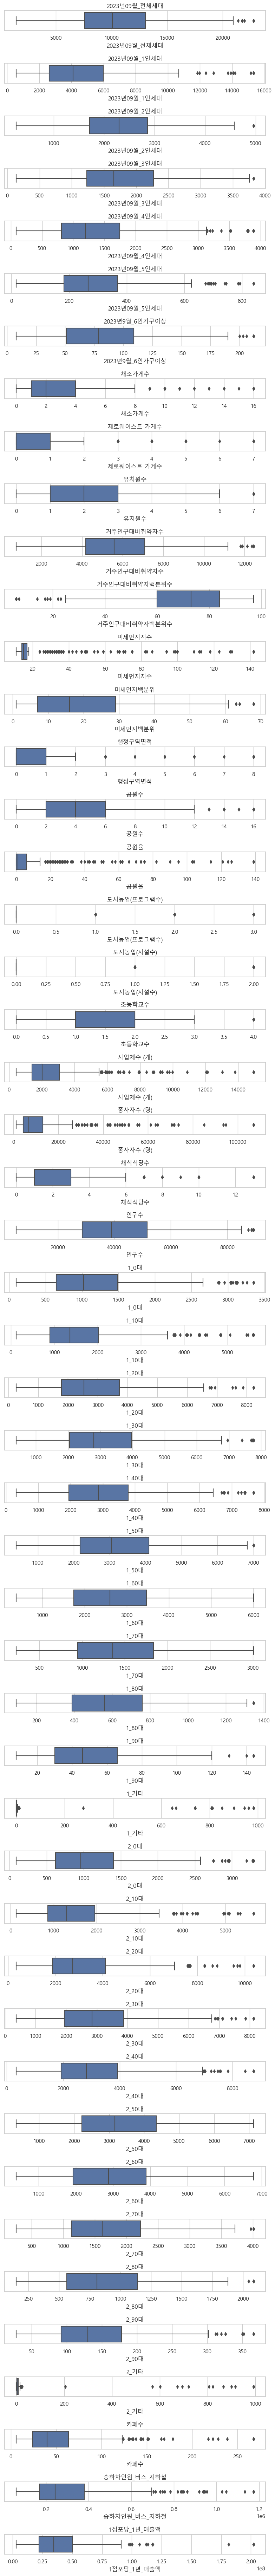

In [96]:
show_outlier(winsorized_df)

In [101]:
# 인구 연령대별로 묶고 윈저라이즈 적용하기
merged_age = data.copy()
merged_age['남자_10대이하'] = merged_age['1_0대'] + merged_age['1_10대']
merged_age['남자_20_30대'] = merged_age['1_20대'] + merged_age['1_30대']
merged_age['남자_40_60대'] = merged_age['1_40대'] + merged_age['1_50대'] + merged_age['1_60대']
merged_age['남자_70대이상'] = merged_age['1_70대'] + merged_age['1_80대'] + merged_age['1_90대'] + merged_age['1_기타']

merged_age['여자_10대이하'] = merged_age['2_0대'] + merged_age['2_10대']
merged_age['여자_20_30대'] = merged_age['2_20대'] + merged_age['2_30대']
merged_age['여자_40_60대'] = merged_age['2_40대'] + merged_age['2_50대'] + merged_age['2_60대']
merged_age['여자_70대이상'] = merged_age['2_70대'] + merged_age['2_80대'] + merged_age['2_90대'] + merged_age['2_기타']

In [106]:
merged_age.drop(columns=['1_0대', '1_10대', '1_20대',
       '1_30대', '1_40대', '1_50대', '1_60대', '1_70대', '1_80대', '1_90대', '1_기타',
       '2_0대', '2_10대', '2_20대', '2_30대', '2_40대', '2_50대', '2_60대', '2_70대',
       '2_80대', '2_90대', '2_기타'], inplace=True)

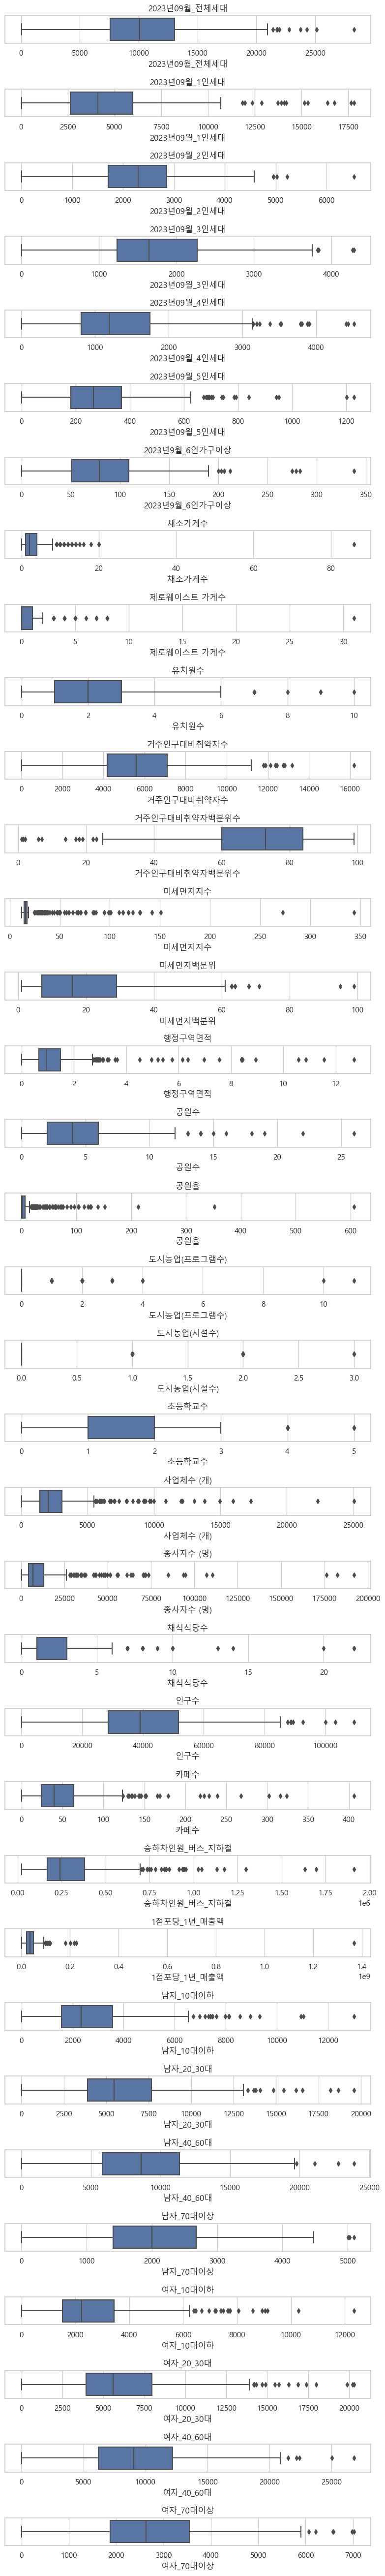

In [107]:
show_outlier(merged_age)

In [109]:
# 윈저라이즈 적용
percentile = 0.01
winsorized_merged_age_df = winsor_outlier(merged_age, percentile)

In [130]:
for i in merged_age['1점포당_1년_매출액'].astype('int').nlargest(5).to_dict().itmes():
    print(i)

이촌1동
신길5동
중앙동
면목4동
대림1동


In [137]:
merged_age['1점포당_1년_매출액'].astype('int').nlargest(5).to_dict().items()

dict_items([('이촌1동', 1367609758), ('신길5동', 226548039), ('중앙동', 217635401), ('면목4동', 216713402), ('대림1동', 202274700)])

In [136]:
for k, i in merged_age['1점포당_1년_매출액'].astype('int').nlargest(5).to_dict().items():
    print('winsorize 전후 비교_1점포당_1년_매출액')
    for k, j in winsorized_merged_age_df['1점포당_1년_매출액'].nlargest(5).to_dict().items():
        print(f"{k} : {i} -> {j}")

winsorize 전후 비교_1점포당_1년_매출액
대림1동 : 1367609758 -> 202274700
면목4동 : 1367609758 -> 202274700
신길5동 : 1367609758 -> 202274700
이촌1동 : 1367609758 -> 202274700
중앙동 : 1367609758 -> 202274700
winsorize 전후 비교_1점포당_1년_매출액
대림1동 : 226548039 -> 202274700
면목4동 : 226548039 -> 202274700
신길5동 : 226548039 -> 202274700
이촌1동 : 226548039 -> 202274700
중앙동 : 226548039 -> 202274700
winsorize 전후 비교_1점포당_1년_매출액
대림1동 : 217635401 -> 202274700
면목4동 : 217635401 -> 202274700
신길5동 : 217635401 -> 202274700
이촌1동 : 217635401 -> 202274700
중앙동 : 217635401 -> 202274700
winsorize 전후 비교_1점포당_1년_매출액
대림1동 : 216713402 -> 202274700
면목4동 : 216713402 -> 202274700
신길5동 : 216713402 -> 202274700
이촌1동 : 216713402 -> 202274700
중앙동 : 216713402 -> 202274700
winsorize 전후 비교_1점포당_1년_매출액
대림1동 : 202274700 -> 202274700
면목4동 : 202274700 -> 202274700
신길5동 : 202274700 -> 202274700
이촌1동 : 202274700 -> 202274700
중앙동 : 202274700 -> 202274700


In [113]:
winsorized_merged_age_df['1점포당_1년_매출액'].nlargest(5)

대림1동    202274700
면목4동    202274700
신길5동    202274700
이촌1동    202274700
중앙동     202274700
Name: 1점포당_1년_매출액, dtype: int32

In [118]:
merged_age['인구수'].nsmallest(5)

둔촌1동      61.0
반포본동     532.0
소공동     4414.0
삼청동     4554.0
을지로동    5300.0
Name: 인구수, dtype: float64

In [119]:
winsorized_merged_age_df['인구수'].nlargest(5)

독산1동    89344
신정3동    89344
위례동     89344
진관동     89344
화곡1동    89344
Name: 인구수, dtype: int32

In [123]:
merged_age[(merged_age.index == '반포본동') | (merged_age.index == '둔촌1동')]

,2023년09월_전체세대,2023년09월_1인세대,2023년09월_2인세대,2023년09월_3인세대,2023년09월_4인세대,2023년09월_5인세대,2023년9월_6인가구이상,채소가게수,제로웨이스트 가게수,유치원수,...,승하차인원_버스_지하철,1점포당_1년_매출액,남자_10대이하,남자_20_30대,남자_40_60대,남자_70대이상,여자_10대이하,여자_20_30대,여자_40_60대,여자_70대이상
둔촌1동,39,27,5,3,4,0,0,0.0,0.0,0.0,...,52391.0,35036700.63,3,10,17,3,3,8,14,3
반포본동,126,67,22,19,16,1,1,1.0,0.0,1.0,...,69837.0,32218578.30,44,42,140,28,62,54,130,32


In [116]:
df_name = 'winsorized_merged_age'
winsorized_merged_age_df.to_csv(f"./data_to_model/data_with_{df_name}_{percentile}.csv")